# Handwritten Digit Prediction with a Feedforward Neural Network

In this notebook, we will explore the powerful world of deep learning using a feedforward neural network (FNN) to predict handwritten digits. We will use the famous MNIST dataset, which is a collection of 70,000 images of handwritten digits from 0 to 9. Each image is grayscale and measures 28x28 pixels, making it an excellent starting point for deep learning due to its simplicity.

## Notebook Structure

The notebook is organized as follows:

1. **Importing Necessary Libraries**: We start by importing all the necessary libraries for our analysis. This includes pandas and numpy for data manipulation, matplotlib for data visualization, and of course, TensorFlow for building and training our neural network model.

2. **Loading and Preprocessing the Data**: We load the MNIST dataset using the `load_data` function from TensorFlow. Then, we normalize the images by dividing each pixel by the maximum value (255), which gives us pixel values between 0 and 1.

3. **Building the Model**: We build our FNN model using the Keras API in TensorFlow. Our model consists of three dense layers, with the ReLU activation function for the first two layers and the softmax activation function for the output layer.

4. **Training the Model**: We compile our model with the Adam optimizer and "sparse_categorical_crossentropy" loss, which is suitable for multiclass classification. Then, we train the model on our training dataset for three epochs.

5. **Model Evaluation**: We evaluate the performance of our model on the test dataset and display the loss and accuracy.

6. **Prediction on a New Image**: Finally, we use our trained model to predict a digit from a new image.

This notebook demonstrates how a neural network can be used for the complex task of handwritten digit recognition. So let's begin our exploration of the fascinating world of deep learning.

The code below is organized into several key steps of data preprocessing, creating and training a neural network model, and finally evaluating the model.

1. **Importing libraries**: The necessary libraries for running this script are imported. This includes 'pandas' and 'numpy' for data manipulation, 'matplotlib.pyplot' for data visualization, 'tensorflow.keras' for building and training neural network models, and 'cv2' (OpenCV) for image manipulation.

2. **Loading the data**: The MNIST dataset is loaded using the `mnist.load_data()` function from Keras, which returns two tuples containing the training and test data respectively.

3. **Data preprocessing**: The training and test data are normalized so that all pixel values are between 0 and 1. This is done using the `normalize` function from Keras.

4. **Creating the neural network model**: A sequential model is created with three layers. The first two layers are dense (fully connected) layers with 128 neurons each and use the ReLU activation function. The last layer is also a dense layer with 10 neurons (corresponding to the 10 digit classes from 0 to 9) and uses the softmax activation function to predict the probability of each class.

5. **Compiling the model**: The model is compiled with the 'adam' optimizer, which is an adaptive stochastic gradient descent method. The loss function used is 'sparse_categorical_crossentropy', which is suitable for multiclass classification problems where the classes are integers (as opposed to one-hot vectors). The evaluation metric used is accuracy.

6. **Training the model**: The model is trained on the training data for 3 epochs.

7. **Evaluating the model**: The model is evaluated on the test data using the `evaluate` method. This returns the model's loss and accuracy on the test data. In this case, the loss is approximately 0.091 and the accuracy is approximately 97.12%, indicating that the model has high performance in predicting handwritten digits on the test data.

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
import cv2 as cv

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [23]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(units=128, activation=tf.nn.relu))
model.add(layers.Dense(units=128, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=3)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2609 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9663
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9712


In [25]:
print(loss, accuracy)

0.09084444493055344 0.9711999893188477


This part of the code tests the ability of the trained neural network model to predict a handwritten digit from an image that you created yourself.

Here is a detailed explanation of the code:

1. **Loading the image**: The image 'digit.png', which contains a digit that you manually wrote (the image should be in 28x28 format), is loaded using the `imread` function from OpenCV. The image is in color, and the `[:,:,0]` code extracts the first color channel (red in the case of an RGB color image) because the neural network model is trained on grayscale images.

2. **Image inversion**: Since the MNIST dataset images are grayscale images where the digit is in white on a black background, we need to invert our image (which is likely a black digit on a white background) to match this format. This is what the `np.invert` function does.

3. **Prediction**: The neural network model is used to predict the digit of the image. Since the model was built to predict the probabilities of each class (digit), the `np.argmax` function is used to select the class with the highest probability. The digit predicted by the model is displayed.

4. **Image display**: Finally, the image is displayed using `plt.imshow` to allow you to visualize the digit you wrote, which is used for prediction.

In your case, the written digit was '6', and the model correctly predicted this digit, demonstrating the model's ability to correctly read handwritten digits, including those that were not part of the original training dataset.

In [30]:
img = cv.imread('digit.png')[:, :, 0]
img = np.invert(np.array([img]))

Prediction : 6


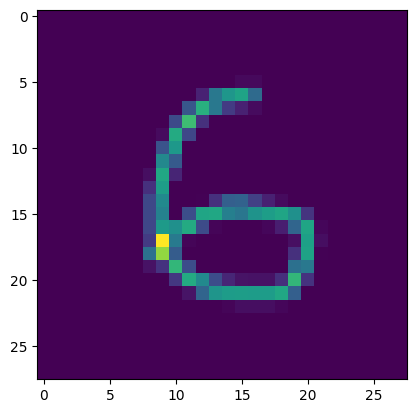

In [32]:
prediction = model.predict(img)
print("Prediction : {}".format(np.argmax(prediction)))
plt.imshow(img[0])